# Lab 5

With k-means, we have started to explore _unsupervised learning_ by clustering the data into $k$ clusters. Today we will explore using **dimension reduction** to summarize our data. Today goals are:

0. Define "data dimension" and why we might need to reduce the dimension of our data
1. View data in three dimensions
2. Begin exploring _Principal Component Analysis_ 

In [ ]:
# Import block 
# (What else is missing?)

%matplotlib notebook 
# Note the difference here!


from mpl_toolkits import mplot3d # <-- New line
import matplotlib.pyplot as plt

#### Data for this Lab

For this lab, we will again using the (fake) student dataset. From this data, construct `justnum`, a numpy array of only the numerical variables from `students`. 

In [ ]:
# Importing the students information 
students = pd.read_csv("../Lab03/students_info.csv")

In [ ]:
# Selecting only the numerical variables AND convert to a numpy array
justnum = students[["coffee", "sleep", "gym", "gpa"]].to_numpy()

## Dimension of Data

The goal of **dimension reduction** is simply to reduce the dimension of your data. So what is the dimension of data?

Recall the shape of our data:

<table>
<thead>
<tr>
<th></th>
<th>Variable 0</th>
<th>Variable 1</th>
<th>Variable 2</th>
<th>Variable 3</th>
<th>Variable 4</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Observation 0</strong></td>
<td>Var 0 of Obs 0</td>
<td>Var 1 of Obs 0</td>
<td>Var 2 of Obs 0</td>
<td>Var 3 of Obs 0</td>
<td>Var 4 of Obs 0</td>
</tr>
<tr>
<td><strong>Observation 1</strong></td>
<td>Var 0 of Obs 1</td>
<td>Var 1 of Obs 1</td>
<td>Var 2 of Obs 1</td>
<td>Var 3 of Obs 1</td>
<td>Var 4 of Obs 1</td>
</tr>
<tr>
<td><strong>Observation 2</strong></td>
<td>Var 0 of Obs 2</td>
<td>Var 1 of Obs 2</td>
<td>Var 2 of Obs 2</td>
<td>Var 3 of Obs 2</td>
<td>Var 4 of Obs 2</td>
</tr>
<tr>
<td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
</tbody>
</table>

We say that the **dimension** of the data is the number of _variables_ in the dataset. This example dataset is 5-dimensional.

In most circumstances, a reduction of dimension is necessary. There are several reasons that make dimension reduction necessary and desired: 
1. Purposes of visualization
2. The "Curse of Dimensionality"

Before proceeding too much further, let us take a look at **how** to make _interactive_ 3D plots in `matplotlib` within the jupyter ecosystem. 

## 3D data visualization in `matplotlib`

#### Lines before `matplotlib` import
During the last few labs, we have had an extra line in our import block. This sets the _options_ for how we use `matplotlib` within jupyter:
 - So far, we have only used `inline` which allowed plots to be within our notebooks.
 - Today we will use `notebook` which will allow for **zoomable** plots.    
 
To learn more about the options for `matplotlib`, read [this post](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1). Be sure that whatever option you chose, it should happen _before_ importing `matplotlib`. 

### Creating a three dimensional scatter plot 

To project in three dimensions, we need to employ `mpl_toolkits` to give us this ability. Following the examples [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html), we begin by setting the figure and the projection of that figure. 

After creating the figure and the projection, we can then use `.scatter` with three data arguments, instead of just two. 

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot 
ax.scatter(justnum[:,0], justnum[:,3], justnum[:,2]);

### Interaction 

Notice that some additional framing has popped up around the plot. These are the interactive pieces. Let's experiment with a few of them: 

* **Resizing the plot** - In the bottom right corner, notice the small triangle (on some machines, this appears as two parallel lines instead). Click on this and drag it to create a bigger (or smaller) plot. 
* **Changing the view** - We can change how the plot is arranged. To do so, click on a piece of the grey plot and then move the plot around. 
* **Stopping the interaction** - Only one plot can interactive at a time, so you need to click the power button to stop the interactive piece. 

**What happened after you clicked the power button?**

***Warning:*** *You need to stop the interaction before you make another plot. Otherwise bad things might happen, such as plotting on an old plot or not plotting at all!*

(Markdown block for you to add what a few notes about what you notice)





#### Adding color
We can also add color to our plots just as before using the `c` and `cmap` flags. Add color to our plot using the "Greens" colormap: 

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot with colors
ax.scatter(num4[:,0], num4[:,3], num4[:,2], ????);

#### Adding Axes using `plot()`

While you can use `plot()` to plot a line in three dimensions, in this notebook, we will use it to create axes. 

First, we will use `linspace` and `zeros` to create numpy arrays which will then become the axes: 

In [ ]:
# Creating the first axis
x_min = min(np.min(num4[:,0]),-1)
x_max = np.max(num4[:,0])
x_axis = np.linspace(x_min,x_max, 1000)

# Creating the second axis
y_min = min(np.min(num4[:,3]),-1)
y_max = np.max(num4[:,3])
y_axis = np.linspace(y_min,y_max, 1000)

# Creating the third axis
z_min = min(np.min(num4[:,2]),-1)
z_max = np.max(num4[:,2])
z_axis = np.linspace(z_min,z_max, 1000)

# Create a vector of zeros to be the same length as the axes
axis_0 = np.zeros(1000)


In [ ]:
# Check out what you have created in this code block




#### Using `plot()` for 3D
Using the numpy arrays, first create plot layers with the axes and then add your points on top. 

Notice that just as with `scatter`, to create a 3D line with `plot`, we can three data arguments once we have set the projection view. 

Once you have created your plot, re-orient the plot so that the data faces towards you with the axes are behind and below the data. 

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create each axis individually and 
#    use the color flag make sure each one is black
ax.plot(x_axis, axis_0, axis_0, c="k")
ax.plot(axis_0, y_axis, axis_0, c=???)
ax.plot(axis_0, axis_0, z_axis, c=???)

# Create the SCATTER() plot with colors
ax.scatter(num4[:,0], num4[:,3], num4[:,2]);

**Wait here for a class discussion** 

### Dimension reduction for Visualizations

Even with the best 3D plotting skills, it can be more than a challenge to view three-dimensional data on a screen (that is a two-dimensional object). Which leads us to a question: **What is the best flat (or 2D) representation of data?**

There are a few ways to answer this question. The first option is to create all possible 2D visualizations made of all combinations of two variables. The second option is to create all possible 3D visualizations and simply swirl the visualizations until you find an acceptable 2D view. Both of these options are exhausting. 

Visualization is not the only reason to lower the dimension. There is another technical reason, as we discuss below. 


### The "Curse of Dimensionality" 

With very high dimensional data, we may have data that becomes very spread out and starts to look as though each point is equally spread from every other point. In these cases it becomes necessary to reduce the dimensionality of the data such that we gain back definition between what is "near" and "far" in terms of distances between data points. 

## Dimension Reduction via PCA

There are many ways to reduce the dimension. As absurd as the option of finding acceptable 2D view of a 3D plot sounds, this is the goal of _Principal Component Analysis_ but done in a more routine manner. Our ultimate goal is to create a transformation for our data into a lower dimensional space. We can think of this as:

$ \textrm{Data Matrix} \Rightarrow_{\textrm{transform}} \textrm{Lower Dimension}$ 

The transformation arrow is a matrix that we multiply our data array by to project our data into the lower dimensional space. This lower dimensional space should provide the best view of our data for that number of dimensions. 

### A First Example

Before we begin with details of PCA, let's consider an example on `justtwo` made of the `gym` and `coffee` variables. 

In [ ]:
justtwo = students[['gym','coffee']].to_numpy()

In PCA, we are looking for the best view of the data. The "best view" can be considered to be the directions of greatest spread. In this simple example, we are looking for how to lay down a set of axes where each stretches in the directions of most spread:

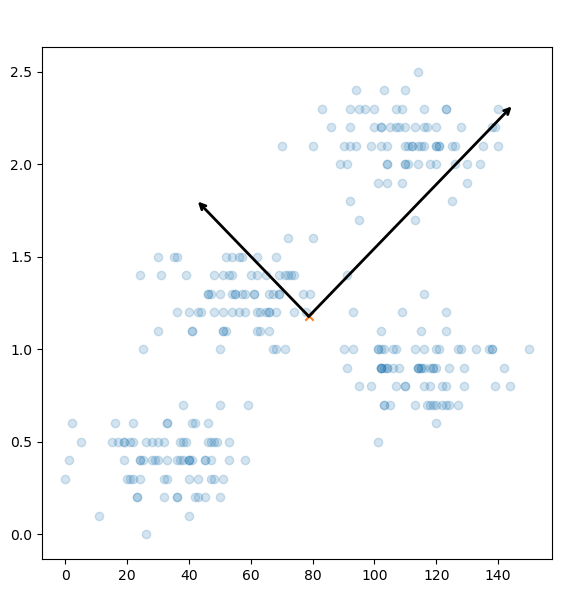

What these axes tell us is how to tilt this two dimensional data such that the greatest spread is now on the x-axis and the second greatest spread is on the y-axis. The above plot was created by referring to a plot from [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html). 

### A Second Example

In addition to altering the view of data, we can also reduce the dimension of our data to just one dimension. In other words, if we were to find the best representation for our data on a single line, what would it be and what it would look like? 


This plot shows how our two-dimensional data would project best into a one-dimensional space: 

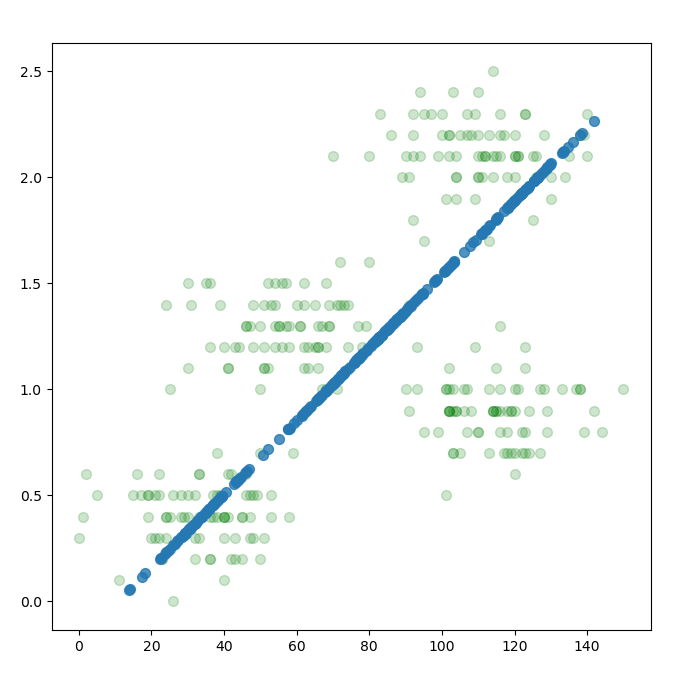

## Details of PCA

This discussion is a less precise and technical one than either of these: [1](https://plot.ly/ipython-notebooks/principal-component-analysis/) and [2](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html). The goal of this section is to provide a general understanding of how and why PCA works. 

### Step 0 - Standardizing the Data

Heuristically, PCA is looking for the directions of greatest spread of our data. This means that the scale of the data will impact each other. 

In a previous lab, we discussed that there are two commonly used ways to scale variables: [normalizing and standardizing](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc). For this lab, we will _standardize_ all our variables which will center each variable at 0 with a standard deviation equal to 1. 

To _standardize_ variables, we need to find the mean and standard deviation (denoted _std_ ) for each one. Then we use them as follows:

$Var_{standard} = \dfrac{Var - Var_{mean}}{Var_{sd}}$

Instead of looping over all the rows for each variable, we can do this computation as a `for` loop over the columns. 

In [ ]:
mean_vec = np.mean(justtwo, axis=0)
sd_vec = np.std(justtwo, axis=0)

justtwo_std = justtwo.copy()

for i in range(justtwo.shape[1]):
    justtwo_std[:,i] = (justtwo[:,i] - mean_vec[i]*np.ones(justtwo.shape[0]))/sd_vec[i]

The array `justtwo_norm` is each of the variables contained in `justtwo` standardized, but in the same place. Notice the use of `axis=0` for both the mean and standard deviation computations. If you're still having trouble with understanding axes, see [this explanation](https://www.sharpsightlabs.com/blog/numpy-axes-explained/).

Before moving on, check that only the data's scale has been changed (and nothing else). 

In [ ]:
# Check the new data array - 




At the end of step 0, we have data that is scaled such that each one is centered at 0 and standard deviation is 1. This means that the "typical variation of the datapoints is 1 unit from center". In other words, a lot -- but not all -- of our _standardized_ data is within 1(ish) unit of 0. 


**Note** - By standardizing the data to have the same spread, we are saying that each variable is as important as every other variable. If this is not the case for your data, you should still center your data about 0, but not necessarily set the standard deviation of each variable to 1 (as we did here). 

### Step 1 - Covariance 
If PCA is looking for the best view that shows off the directions of greatest spread, then we begin by examining which variables have similar shape and direction. In other words, we would like to understand the _covariance_ of every possible pairing our variables:
* If two variables tend in the same (or exact opposite) direction, then their covariance will be close to 1. 
* If two variables move in completely tangential (ie. completely different) directions, then their covariance will be close to 0. 

We can create a matrix of every possible pair of variables and create a covariance matrix: 

<table>
<thead>
<tr>
<th></th>
<th>Variable 0</th>
<th>Variable 1</th>
<th>Variable 2</th>
<th>...</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Variable 0</strong></td>
<td>Covariance of Var 0 and Var 0</td>
<td>Covariance of Var 0 and Var 1</td>
<td>Covariance of Var 0 and Var 2</td>
<td>...</td>
</tr>
<tr>
<td><strong>Variable 1</strong></td>
<td>Covariance of Var 1 and Var 0</td>
<td>Covariance of Var 1 and Var 1</td>
<td>Covariance of Var 1 and Var 2</td>
<td>...</td>
</tr>
<tr>
<td><strong>Variable 2</strong></td>
<td>Covariance of Var 2 and Var 0</td>
<td>Covariance of Var 2 and Var 1</td>
<td>Covariance of Var 2 and Var 2</td>
<td>...</td>
</tr>
<tr>
<td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
</tbody>
</table>


If we are comparing the variables to each other pairwise, what size do you think the resulting matrix should be? 

Using `cov` within the numpy package, we can compute the pairwise covariance of objects. Test the next line of code. Is this what you expect? 



In [ ]:
cov_mat = np.cov(justtwo_std)

Note that in this computation, we want to compare the information within one whole variable to the information in another whole variable. So for this computation, the objects of interest are the variables and not the observations. Since `numpy` treats rows as the objects of interest, we need to 'flip' our dataset -- temporarily -- so that it is arranged with the variables along the rows and the observations are the columns. To do this this momentary flip, we use the _transpose_ operator `.T`. 

Does the below give you the shape that you expect? 

In [ ]:
cov_mat = np.cov(justtwo_std.T)
cov_mat

After Step 1, we have a covariance matrix between our variables. This matrix is telling us how much each pair of our variables tend in the same direction. 

### Repositioning the View

Now that we know how pairs of our variables tend, the next step is to determine the vector that points in the direction of the most data spread _given the covariance matrix_ that we computed. This vector lies along what will be the axis for our best one-dimensional representation. 

After this first vector, we want to find the vector that points in the direction of the second most data spread. We want this second vector/axis to add as much to our representation without duplicating the information in our best one-dimensional representation. So just like the axes that we usually see on graphs, our first vector (of most spread) will be perpendicular to our second vector (of second most spread).

We can continue this proces for as many directions of spread that we are interested in. Given that our data in this example is two-dimensional, the most number of "spread" vectors that we can find is two. 

This vector exploration could be done iteratively using a process called _gradient descent_ but we can also do this directly using _eigenvectors_ for the covariance matrix. 

#### Detour to Eigen-land 

_Note_ - The explanations in [this article](https://skymind.ai/wiki/eigenvector) inspired the below descriptions. 

In this class, we have been working with data as arrays. We can also think of arrays as matrices, and like singular numbers, we can do multiplication with matrices. If we multiply with a matrix on the left of a vector, this is called a _linear transformation_ which is fancy math language for "a kind of rotatation and stretching of vectors." We can not tear or bend a vector, but we can use matrices to encode stretching or bending in a particular way. So (in math-adjacent speak) if we have a matrix $M$ and a vector $x$, then the vector $Mx$ is the resulting rotated and stretched version of $x$. 

There are special vectors where when we left multiply by $M$, stretch but do not rotate. Put another way, if $z$ is one such special vector, then the resulting $Mz$ is still in the same direction of $z$. In symbols, we have $Mz = \lambda \cdot z$, where $\lambda$ is the amount of stretch. These kind of vectors are called _eigenvectors_ and the $\lambda$, ie. the stretch, associated to them are called _eigenvalues_.

The _eigenvectors_ are our spread-axes and the _eigenvalues_ tell us their importance. Luckly `numpy` has this computation pre-computed for us within the `linalg` submodule (or "linear algebra" submodule). To learn more about the theory behind eigenvectors and eigenvalues, please consider taking Linear Algebra in the math department. 


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)


In [ ]:
# Block for further exploration
# What are eig_vecs and eig_vals? 


**NOTE** - The eigenvectors are as COLUMNS here (not rows). 

We have our eigenvectors and their associated eigenvalues, but they are not in the order of importance, ie. with the eigenvector associated to the largest eigenvalue first. We need to reorder the eigenvalues and their associated eigenvectors in descending order. To do this, we will use `argsort` which will give us the indices of an ascending sort plus cleaverly placed minus sign to get the indices in descending order:

In [ ]:
inds = (-np.abs(eig_vals)).argsort()

In [ ]:
# Code block to check out the INDS variable


(Why does the minus sign work in this placement?)

**Note** - Occasionally due to rounding, our eigenvalues become very small negative numbers. We use `np.abs()` to account for this. 

Now we need to arrange both the eigenvalues and the eigenvectors in this order. Recalling that eigenvectors are columns, how can we rearrange our eigen-information?

In [ ]:
eig_vals = eig_vals[inds]
pri_comps = eig_vecs[:,inds]

### Step 2 - Pushing our data to a lower dimensional space

Now in their new order, the array of our eigenvectors are the **principal components** for our data and they become the vehicle that we use to tranform our data. For example, if we want to tranform our two-dimensional data into one-dimensional data, we can right multiply by the first principle component (ie. the first eigenvector, which is the one associated to the LARGEST eigenvalue). Let's try this and see what happens:

In [ ]:
# Create a 2d numpy array of just the first principal components
pri_comp1 = np.array([pri_comps[:,0]]).T

# Create one-D projection
oneD = np.dot(justtwo_std, pri_comp1)

**Note** - Because we are working on with an one-dimensional object, we need to force numpy to recognize this as a 2d array. To do this, we add `np.array([  ])` around our variables. We also use the transpose operator to ensure that we have a column vector as desired. 

In [ ]:
# See what we've created
plt.scatter(oneD,np.zeros(300))

At the end of step two, we have created a one-dimensional representation for our data. But this is a bit challenging to believe because, we've created something that is centered at 0, when our original data was not. So to see our representation on top of our standardized data, we need to perform an _inverse transform_ to push the representation back to our orignal two-dimensional space. 

To push back, we right multiply by the _transpose_ of our principle component:



In [ ]:
# Push back up to 2D
oneD_in2 = np.dot(oneD,???)

Let's again check our work by layering our standardized data with the 2D representation of our one-dimensional representation. 

In [ ]:
plt.scatter(justtwo_std[:,0], justtwo_std[:,1], alpha = 0.2)
plt.scatter(oneD_in2[:,0],oneD_in2[:,1])


This still feels so unsatisfying because our original data is still not centered at 0. To fix this, we need to undo the original standardizing that we did back in Step 0. That is, we need to re-stretch our data and then move it back to the original center.

In [ ]:
oneD_in2real = oneD_in2.copy()
oneD_in2real[:,0] = oneD_in2[:,0]*sd_vec[0]+mean_vec[0]
oneD_in2real[:,1] = oneD_in2[:,1]*sd_vec[1]+mean_vec[1]

Let's again check our work by layering our data with the 2D representation of our stretched one-dimensional representation. 

In [ ]:
plt.scatter(justtwo[:,0], justtwo[:,1], alpha = 0.2)
plt.scatter(oneD_in2real[:,0],oneD_in2real[:,1])

## Next time

Next time, we will look at how to use `sklearn` for PCA, and how to use the eigenvalues to select the desired number of components. While the latter might not seem relevant yet, as our example in this lab examined PCA by doing a dimension reduction from 2D to 1D. Next time, we will look at doing a dimension reduction from 4D to something lower. Also, we will examine another kind of dimension reduction called _Singular Value Decomposition_ or SVD. 

### Final Thoughts

To finish up this lab, read about the [PCA implementation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) in `sklearn` and create a post to **#lab_submission** channel on slack sharing one surprising thing about PCA that you learned by first walking through it and then reading about it in `sklearn`. Your post must start with **Lab5** to get credit. 

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab5**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### References consulted
0. _Doing Data Science: Straight talk from the frontline_ by C. O'Neil & R. Schutt (2014)
1. _Python Machine Learning_
2. [Three-Dimensional Plotting in Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
3. [mplt3d tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
4. [Using matplotlib in jupyter notebooks — comparing methods and some tips](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1)
5. [linspace helpfile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
6. [Principal Component Analysis in Python](https://plot.ly/ipython-notebooks/principal-component-analysis/)
7. [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
8. [Answer 1 to Question - Not normalizing data before PCA gives better explained variance ratio](https://stats.stackexchange.com/questions/105592/not-normalizing-data-before-pca-gives-better-explained-variance-ratio)
9. [A Beginner's Guide to Eigenvectors, Eigenvalues, PCA, Covariance and Entropy](https://skymind.ai/wiki/eigenvector)
10. [pandas copy helpfile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)
11. [eig helpfile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)
12. [Q: Is it possible to use argsort in descending order?](https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order)
13. [PCA inverse transform manually](https://stackoverflow.com/questions/32750915/pca-inverse-transform-manually)
14. [Everything you did and didn't know about PCA](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/#notation)
15. [scikit source code](https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/decomposition/base.py#L135)
16. [numpy axes explained](https://www.sharpsightlabs.com/blog/numpy-axes-explained/)